# CIFAR10 - CNN PyTorch

## Load Library

In [17]:
import sys, shutil
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from tqdm import tqdm
from torchvision.datasets import CIFAR10
from torchvision import transforms
from torch.utils.data import DataLoader

sys.path.insert(0, '..')

from packages.utils import plot_images

np.random.seed(0)
torch.manual_seed(0)

## Configuration

In [18]:
CONFIG = {
    'DEVICE': torch.device('cuda' if torch.cuda.is_available() else 'cpu'),
    "DATASET_FOLDER": "../downloads/CIFAR10",
    "CLASSES": ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'],
    "BATCH_SIZE": 128
}

## Load Data

In [19]:
my_transforms = transforms.Compose([
    transforms.ToTensor()
])

In [20]:
trainset = CIFAR10(CONFIG["DATASET_FOLDER"], train=True, download=True, transform=my_transforms)
testset = CIFAR10(CONFIG["DATASET_FOLDER"], train=False, download=True, transform=my_transforms)

Files already downloaded and verified
Files already downloaded and verified


In [21]:
trainloader = DataLoader(trainset, batch_size=CONFIG["BATCH_SIZE"], shuffle=True)
testloader = DataLoader(testset, batch_size=CONFIG["BATCH_SIZE"], shuffle=False)

## Visualize Data

### Train Data

No. of training images: 50000


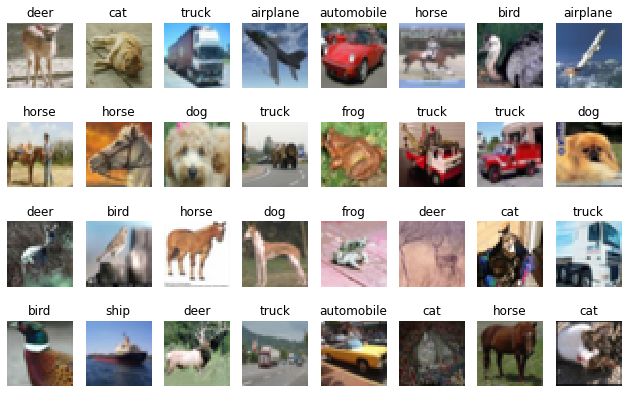

In [22]:
print(f'No. of training images: {len(trainset)}')

for images, labels in trainloader:
    text_labels = [CONFIG["CLASSES"][index] for index in labels.numpy()]
    plot_images(images[:32].permute(0, 2, 3, 1), text_labels, columns=8, figsize=(11, 7), cmap=None)
    break

### Test Data

No. of test images: 10000


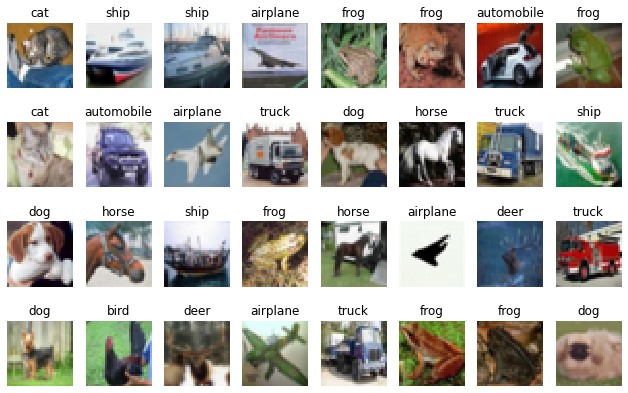

In [23]:
print(f'No. of test images: {len(testset)}')

for images, labels in testloader:
    text_labels = [CONFIG["CLASSES"][index] for index in labels.numpy()]
    plot_images(images[:32].permute(0, 2, 3, 1), text_labels, columns=8, figsize=(11, 7), cmap=None)
    break

# Model Class

In [30]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5), # (N, 3, 32, 32) -> (N, 6, 28, 28)
            nn.LeakyReLU(),
            nn.AvgPool2d(2, stride=2), # (N, 6, 28, 28) -> (N, 6, 14, 14)
            nn.Conv2d(6, 16, 5), # (N, 6, 14, 14) -> (N, 16, 10, 10)
            nn.LeakyReLU(),
            nn.AvgPool2d(2, stride=2) # (N, 16, 10, 10) -> (N, 16, 5, 5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400, 120), # (N, 400) -> (N, 120)
            nn.LeakyReLU(),
            nn.Linear(120, 84), # (N, 120) -> (N, 84)
            nn.LeakyReLU(),
            nn.Linear(84, 10) # (N, 84) -> (N, 10)
        )
    
    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc_model(x)
        return x

## Util Methods

In [31]:
def fit(trainloader, testloader, model, criterion, optimizer, epochs=1):    
    train_loss = []
    for epoch in tqdm(range(epochs), total=epochs, unit='epoch', desc='Epoch', position=0):
        losses = []
        for images, labels in tqdm(trainloader, unit='batch', desc='Batch', position=1, leave=False):
            images = images.to(CONFIG['DEVICE'])
            labels = labels.to(CONFIG['DEVICE'])
            # Forward Pass
            output = model(images)
            loss = criterion(output, labels)

            # Backward Pass
            loss.backward()
            optimizer.step()

            optimizer.zero_grad()
            
            with torch.no_grad():
                train_loss.append(loss.data.item())
    plt.plot(train_loss)
    plt.show()
            
    with torch.no_grad():
        losses = []
        correct = 0
        for images, labels in trainloader:
            images, labels = images.to(CONFIG['DEVICE']), labels.to(CONFIG['DEVICE'])
            output = model(images)
            loss = criterion(output, labels)
            losses.append(loss.data.item())
            _, labels_pred = torch.max(output, 1)
            correct += (labels_pred == labels).sum().item()
        print(f'Final Train Loss: {sum(losses)/len(losses)}')
        print(f'Final Train Accuracy: {round(correct/len(trainloader.dataset)*100, 3)}%')

        losses = []
        correct = 0
        for images, labels in testloader:
            images, labels = images.to(CONFIG['DEVICE']), labels.to(CONFIG['DEVICE'])
            output = model(images)
            loss = criterion(output, labels)
            losses.append(loss.data.item())
            _, labels_pred = torch.max(output, 1)
            correct += (labels_pred == labels).sum().item()
        print(f'Final Test Loss: {sum(losses)/len(losses)}')
        print(f'Final Test Accuracy: {round(correct/len(testloader.dataset)*100, 3)}%')

## Train Model

Epoch: 100%|██████████| 10/10 [03:50<00:00, 23.00s/epoch]


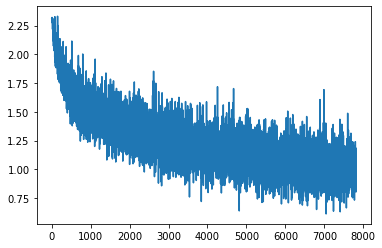

Final Train Loss: 0.9587400986258027
Final Train Accuracy: 65.944%
Final Test Loss: 1.1714772111291338
Final Test Accuracy: 58.66%


In [38]:
model = LeNet().to(CONFIG['DEVICE'])
criterion = nn.CrossEntropyLoss()
epochs = 10
learning_rate = 0.0009
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

fit(trainloader, testloader, model, criterion, optimizer, epochs)

Epoch: 100%|██████████| 10/10 [03:16<00:00, 19.66s/epoch]


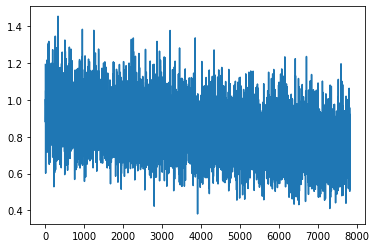

Final Train Loss: 0.6813480568587628
Final Train Accuracy: 76.22%
Final Test Loss: 1.1729244806204633
Final Test Accuracy: 61.18%


In [39]:
epochs = 10
learning_rate = 0.0006
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

fit(trainloader, testloader, model, criterion, optimizer, epochs)

Epoch: 100%|██████████| 5/5 [01:32<00:00, 18.59s/epoch]


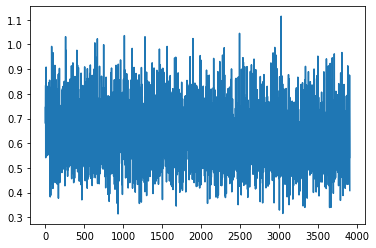

Final Train Loss: 0.5858549240528775
Final Train Accuracy: 79.99%
Final Test Loss: 1.221377860208985
Final Test Accuracy: 61.38%


In [40]:
epochs = 5
learning_rate = 0.0002
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

fit(trainloader, testloader, model, criterion, optimizer, epochs)

Epoch: 100%|██████████| 5/5 [01:53<00:00, 22.61s/epoch]


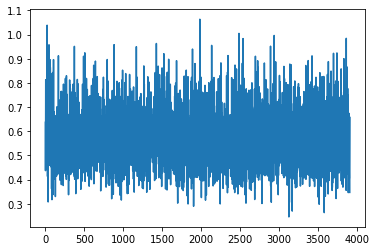

Final Train Loss: 0.5622557605166569
Final Train Accuracy: 80.996%
Final Test Loss: 1.2381297125937833
Final Test Accuracy: 61.32%


In [41]:
epochs = 5
learning_rate = 0.00005
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

fit(trainloader, testloader, model, criterion, optimizer, epochs)